In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import my class Circle
from Circle import Circle

sigma_1 = 1291 kPa, sigma_3 = 365 kPa
On plane AE, Normal traction = 414 kPa, shear traction = 207 kPa


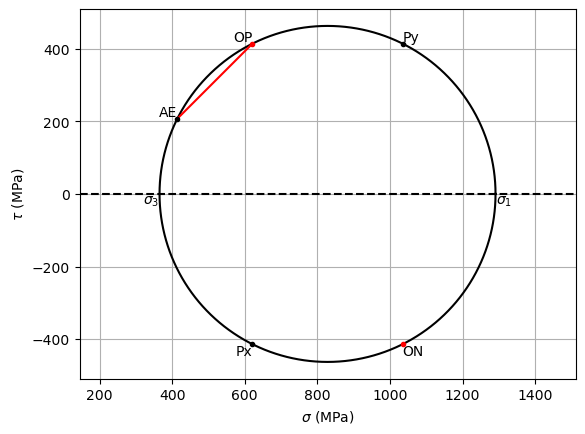

In [2]:
# Example 3 in folelesning 8 
# This is Example 10.3 in Das (2002): Geotechnical Engineering
# tractions
sxx = 621
sxy = -414 # clockwise
syy = 1035
syx = 414 # anticlockwise

# construct Mohr Circle
circle = Circle([0,0], 1)
points = np.array([[sxx,sxy],[syy,syx],[syy,sxy]])
circle.fit_three_points(points)
x,y = circle.coordinates()

# sigma1 and sigma3 values
sigma_1 = circle.center[0] + circle.radius
sigma_3 = circle.center[0] - circle.radius
print(f"sigma_1 = {sigma_1:.0f} kPa, sigma_3 = {sigma_3:.0f} kPa")

# find the pole to normals
pole_normals = circle.chord_endpoint([sxx,sxy], np.radians(180))
# find the pole to planes (Ragan, 2009)
pole_planes = circle.chord_endpoint([sxx,sxy], np.radians(90)) 
# find the tractions on plane AE
tractions = circle.chord_endpoint(pole_planes, np.radians(225))
chord_p = np.array([pole_planes, tractions])
print(f"On plane AE, Normal traction = {tractions[0]:.0f} kPa, shear traction = {tractions[1]:.0f} kPa")

# plot Mohr Circle
fig, ax = plt.subplots()
# circle
ax.plot(x, y, "k")
# sigma_1 and sigma_3 labels
ax.text(sigma_1, 0, r"$\sigma_1$", ha="left", va="top")
ax.text(sigma_3, 0, r"$\sigma_3$", ha="right", va="top")
# planes
ax.plot(sxx, sxy, "k.")
ax.text(sxx, sxy, "Px", ha="right", va="top")
ax.plot(syy, syx, "k.")
ax.text(syy, syx, "Py", ha="left", va="bottom")
# poles
ax.plot(pole_normals[0], pole_normals[1], "r.")
ax.text(pole_normals[0], pole_normals[1], "ON", ha="left", va="top")
ax.plot(pole_planes[0], pole_planes[1], "r.")
ax.text(pole_planes[0], pole_planes[1], "OP", ha="right", va="bottom")
# tractions on plane AE
ax.plot(chord_p[:,0],chord_p[:,1],"r-")
ax.plot(tractions[0],tractions[1],"k.")
ax.text(tractions[0],tractions[1],"AE", ha="right", va="bottom")

# grid
ax.grid()
# horizontal line at tau = 0
ax.axhline(0,color="k",linestyle="--")
# axes labels
ax.set_xlabel(r"$\sigma$ (MPa)")
ax.set_ylabel(r"$\tau$ (MPa)")
# axes equal
ax.axis("equal")

plt.show()

sigma_1 = 89 kPa, sigma_3 = 35 kPa
tau_max = 27 kPa


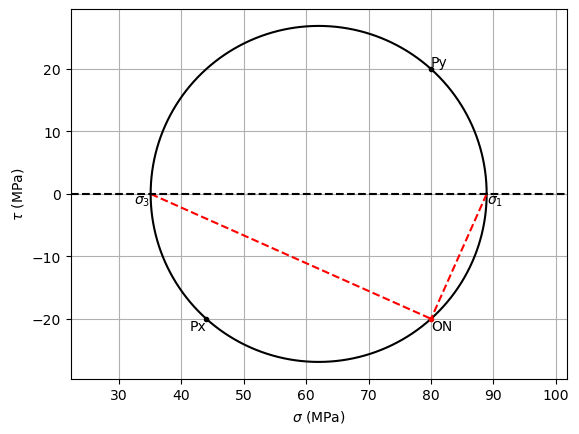

In [3]:
# Second exercise in lecture 8
# This is oppgave 2.4 in Aarhaug (1991): Geoteknikk 1
# tractions
sxx = 44
sxy = -20 # clockwise
syy = 80
syx = 20 # anticlockwise

# construct Mohr Circle
circle = Circle([0,0], 1)
points = np.array([[sxx,sxy],[syy,syx],[syy,sxy]])
circle.fit_three_points(points)
x,y = circle.coordinates()

# sigma1 and sigma3 values
sigma_1 = circle.center[0] + circle.radius
sigma_3 = circle.center[0] - circle.radius
print(f"sigma_1 = {sigma_1:.0f} kPa, sigma_3 = {sigma_3:.0f} kPa")
print(f"tau_max = {circle.radius:.0f} kPa")

# find the pole to normals
pole_normals = circle.chord_endpoint([sxx,sxy], np.radians(180))

# plot Mohr Circle
fig, ax = plt.subplots()
# circle
ax.plot(x, y, "k")
# sigma_1 and sigma_3 labels
ax.text(sigma_1, 0, r"$\sigma_1$", ha="left", va="top")
ax.text(sigma_3, 0, r"$\sigma_3$", ha="right", va="top")
# planes
ax.plot(sxx, sxy, "k.")
ax.text(sxx, sxy, "Px", ha="right", va="top")
ax.plot(syy, syx, "k.")
ax.text(syy, syx, "Py", ha="left", va="bottom")
# pole to normals
ax.plot(pole_normals[0], pole_normals[1], "r.")
ax.text(pole_normals[0], pole_normals[1], "ON", ha="left", va="top")
# sigma_1 and sigma_3 directions
ax.plot([sigma_1,pole_normals[0]],[0,pole_normals[1]],"r--")
ax.plot([sigma_3,pole_normals[0]],[0,pole_normals[1]],"r--")

# grid
ax.grid()
# horizontal line at tau = 0
ax.axhline(0,color="k",linestyle="--")
# axes labels
ax.set_xlabel(r"$\sigma$ (MPa)")
ax.set_ylabel(r"$\tau$ (MPa)")
# axes equal
ax.axis("equal")

plt.show()

Security factor = 1.50


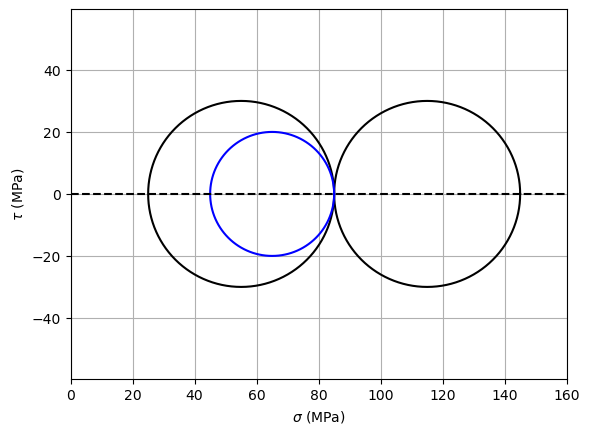

In [4]:
# Second assignment for lecture 11
# This is problem 3.4 in Aarhaug (1992): Geoteknikk

# From problem 3.3, we know su = 30 kPa
su = 30
# sigma_z is 85 kPa
sigma_z = 85
# we need to calculate sigma_x_min and sigma_x_max
sigma_x_min = sigma_z - 2*su # active state
sigma_x_max = sigma_z + 2*su # passive state
# if a wall can sustain sigma_x = 45 kPa, then the security factor is
sigma_x = 45
sf = (sigma_z-sigma_x_min) / (sigma_z-sigma_x)
print(f"Security factor = {sf:.2f}")

# construct Mohr Circle diagram
fig, ax = plt.subplots()
circle = Circle([0,0], 1)
sigma_xs = [sigma_x_min, sigma_x_max, sigma_x]
colors = ["k", "k", "b"]
for i in range(len(sigma_xs)):
    circle.center = [(sigma_z + sigma_xs[i]) / 2, 0]
    circle.radius = np.abs((sigma_z - sigma_xs[i]) / 2)
    x,y = circle.coordinates()
    ax.plot(x, y, colors[i])

# grid
ax.grid()
# horizontal line at tau = 0
ax.axhline(0,color="k",linestyle="--")
# axes labels
ax.set_xlabel(r"$\sigma$ (MPa)")
ax.set_ylabel(r"$\tau$ (MPa)")
# axes equal
ax.axis("equal")
# axis limits
ax.set_xlim([0,160])

plt.show()  

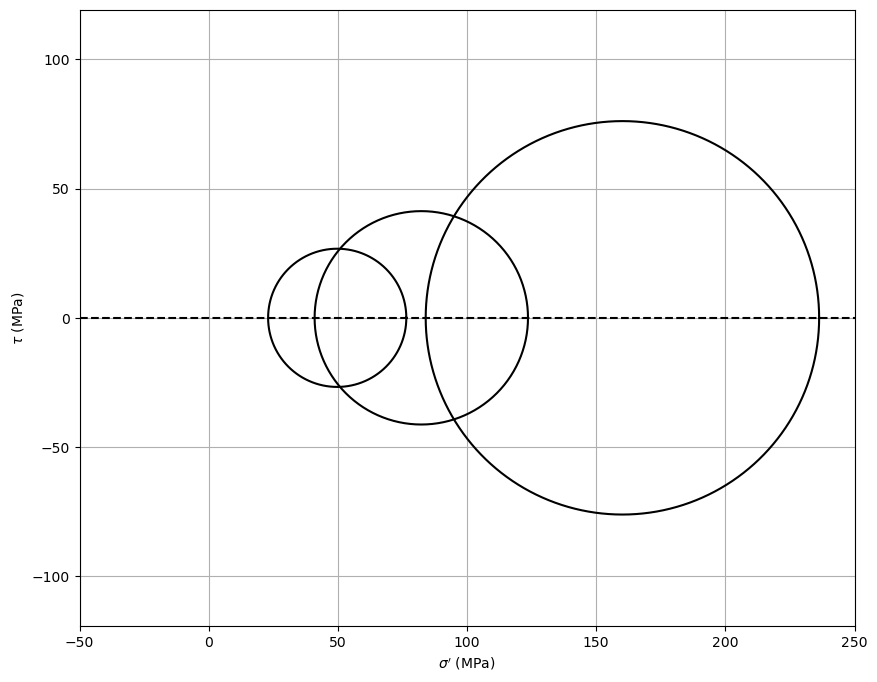

In [5]:
# First assignment (oppgave) in forelesning 12
# This is also oppgave 4.6 in Aarhaug (1991): Geoteknikk 1
sigma_3 = np.array([33, 61, 124])
sigma_1 = np.array([86.5, 143.6, 276.3])
u = np.array([10, 20, 40])
sigma_3_eff = sigma_3 - u
sigma_1_eff = sigma_1 - u

# A CIRCLE
circle = Circle([0,0], 1)
    
fig, ax = plt.subplots(figsize=(10,8))

# construct Mohr Circles
for i in range(len(sigma_3_eff)):
    circle.center = [(sigma_3_eff[i] + sigma_1_eff[i]) / 2, 0]
    circle.radius = (sigma_1_eff[i] - sigma_3_eff[i]) / 2
    x,y = circle.coordinates()
    # plot Mohr Circle
    ax.plot(x, y, "k")

# grid
ax.grid()
# horizontal line at tau = 0
ax.axhline(0,color="k",linestyle="--")
# axes labels
ax.set_xlabel(r"$\sigma'$ (MPa)")
ax.set_ylabel(r"$\tau$ (MPa)")
# axes equal
ax.axis("equal")
# axes limits
ax.set_xlim([-50,250])

plt.show()  